In [1]:
# Import external script
%run models.py

# Import libraries
from sklearn.model_selection import train_test_split as tts

# Import data from CSV
fdata = pd.read_csv('C:/Users/FCiencias/Documents/GitHub/Proyecto/desarrollo/datos_proyecto.csv', index_col="dp_folio")
fdata

,Unnamed: 0,id_sexo,Aedad,AAedad,AIMC,id_gestud,ejer_act,ejer1,ejer5,ejer10,...,salud30,peso_act,peso1,peso5,peso10,peso20,peso30,peso_acc,peso_ehoy,peso_edes
dp_folio,,,,,,,,,,,,,,,,,,,,,
1,1,F,51,6,4,CarTec,0,2,1,1,...,4,4,3,3,3,3,4,1,10,6
2,2,F,38,4,3,Bach,0,0,3,5,...,4,4,3,5,3,3,3,2,6,5
3,3,F,34,3,5,Sec,0,0,0,5,...,7,5,5,5,4,3,7,1,8,4
4,4,M,63,8,4,CarTec,2,2,6,6,...,5,4,4,3,3,3,2,1,7,5
5,5,M,42,4,3,Sec,2,2,0,0,...,6,3,3,2,2,6,6,1,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1076,1072,F,43,5,4,Lic,2,0,0,7,...,5,4,4,4,3,3,3,1,10,7
1077,1073,F,56,7,3,Sec,4,4,0,0,...,5,4,4,3,3,3,3,1,8,5
1078,1074,M,63,8,3,Mast,2,3,5,5,...,5,4,3,3,3,3,3,2,6,6


In [9]:
# Creamos objeto ProbModel de models.py para obtener patrones
pm = ProbModel()

# Clusterize between obese and non obese
obesity = {0:[1,2,3], 1:[4,5,6]}
ndata = pm.clusterize_discrete("AIMC", obesity, "obesity", fdata)

# Clusterize excercise features
ejer = {"B":"greatereq_than(2.5)", "M":"less_than(2.5)"}
ndata = pm.clusterize_continuous("ejer_act", ejer, "ejer_0", ndata)
ndata = pm.clusterize_continuous("ejer1", ejer, "ejer_1", ndata)
ndata = pm.clusterize_continuous("ejer5", ejer, "ejer_5", ndata)
ndata = pm.clusterize_continuous("ejer10", ejer, "ejer_10", ndata)
ndata = pm.clusterize_continuous("ejer20", ejer, "ejer_20", ndata)
ndata = pm.clusterize_continuous("ejer30", ejer, "ejer_30", ndata)
ndata

,Unnamed: 0,id_sexo,Aedad,AAedad,AIMC,id_gestud,ejer_act,ejer1,ejer5,ejer10,...,peso_acc,peso_ehoy,peso_edes,obesity,ejer_0,ejer_1,ejer_5,ejer_10,ejer_20,ejer_30
dp_folio,,,,,,,,,,,,,,,,,,,,,
1,1,F,51,6,4,CarTec,0,2,1,1,...,1,10,6,1,M,M,M,M,M,B
2,2,F,38,4,3,Bach,0,0,3,5,...,2,6,5,0,M,M,B,B,B,M
3,3,F,34,3,5,Sec,0,0,0,5,...,1,8,4,1,M,M,M,B,N,N
4,4,M,63,8,4,CarTec,2,2,6,6,...,1,7,5,1,M,M,B,B,B,B
5,5,M,42,4,3,Sec,2,2,0,0,...,1,5,3,0,M,M,M,M,M,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1076,1072,F,43,5,4,Lic,2,0,0,7,...,1,10,7,1,M,M,M,B,B,B
1077,1073,F,56,7,3,Sec,4,4,0,0,...,1,8,5,0,B,B,M,M,M,B
1078,1074,M,63,8,3,Mast,2,3,5,5,...,2,6,6,0,M,B,B,B,B,B


In [10]:
ndata = pm.group_list_of_variables(["ejer_0", "ejer_1", "ejer_5", "ejer_10"], "ejer0_10", ndata)
ndata

,Unnamed: 0,id_sexo,Aedad,AAedad,AIMC,id_gestud,ejer_act,ejer1,ejer5,ejer10,...,peso_ehoy,peso_edes,obesity,ejer_0,ejer_1,ejer_5,ejer_10,ejer_20,ejer_30,ejer0_10
dp_folio,,,,,,,,,,,,,,,,,,,,,
1,1,F,51,6,4,CarTec,0,2,1,1,...,10,6,1,M,M,M,M,M,B,MMMM
2,2,F,38,4,3,Bach,0,0,3,5,...,6,5,0,M,M,B,B,B,M,MMBB
3,3,F,34,3,5,Sec,0,0,0,5,...,8,4,1,M,M,M,B,N,N,MMMB
4,4,M,63,8,4,CarTec,2,2,6,6,...,7,5,1,M,M,B,B,B,B,MMBB
5,5,M,42,4,3,Sec,2,2,0,0,...,5,3,0,M,M,M,M,M,M,MMMM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1076,1072,F,43,5,4,Lic,2,0,0,7,...,10,7,1,M,M,M,B,B,B,MMMB
1077,1073,F,56,7,3,Sec,4,4,0,0,...,8,5,0,B,B,M,M,M,B,BBMM
1078,1074,M,63,8,3,Mast,2,3,5,5,...,6,6,0,M,B,B,B,B,B,MBBB


In [12]:
# Select relevant data
selected_class = "obesity"
filtered_features = ["id_sexo", "Aedad", "id_gestud", "ejer_0", "ejer_1", "ejer_5", "ejer_10", "ejer0_10"]
sdata = ndata[filtered_features].join(ndata[selected_class])
sdata = sdata[(sdata.ejer_10 != "N") & (sdata.ejer_5 != "N") & (sdata.ejer_1 != "N") & (sdata.ejer_0 != "N")]
sdata

,id_sexo,Aedad,id_gestud,ejer_0,ejer_1,ejer_5,ejer_10,ejer0_10,obesity
dp_folio,,,,,,,,,
1,F,51,CarTec,M,M,M,M,MMMM,1
2,F,38,Bach,M,M,B,B,MMBB,0
3,F,34,Sec,M,M,M,B,MMMB,1
4,M,63,CarTec,M,M,B,B,MMBB,1
5,M,42,Sec,M,M,M,M,MMMM,0
...,...,...,...,...,...,...,...,...,...
1076,F,43,Lic,M,M,M,B,MMMB,1
1077,F,56,Sec,B,B,M,M,BBMM,0
1078,M,63,Mast,M,B,B,B,MBBB,0


In [13]:
# Exportamos el dataframe a formato csv para realizar regresion logistica en R
sdata.to_csv('datos_patronesejercicio.csv', encoding='utf-8')

In [14]:
qf = ["ejer_0", "ejer_1", "ejer_5", "ejer_10"]
inputdf = sdata[qf]
inputdf["obesity"] = sdata["obesity"]
inputdf

C:\Users\FCiencias\AppData\Local\Temp\ipykernel_4312\2841023608.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inputdf["obesity"] = sdata["obesity"]


,ejer_0,ejer_1,ejer_5,ejer_10,obesity
dp_folio,,,,,
1,M,M,M,M,1
2,M,M,B,B,0
3,M,M,M,B,1
4,M,M,B,B,1
5,M,M,M,M,0
...,...,...,...,...,...
1076,M,M,M,B,1
1077,B,B,M,M,0
1078,M,B,B,B,0


# Predicción del Modelo

## Funciones necesarias para predecir usando Naive Bayes

In [22]:
# Libraries for ROC plots
from scipy import interp
from sklearn.metrics import roc_curve, auc

# Libraries for Cross Validation
from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import KFold

# Function to determine if a certain history matches a general pattern
def matchStructure(history, structure):
    if type(history) is str:
        if len(history) != len(structure):
            return False
        for i in range(len(structure)):
            if history[i] != structure[i] and structure[i] != '*':
                return False
        return True
    else:
        return False

#### Functions to count ocurrences for a category of a feature (NX)
# Count the number of instances inside the database whose feature X = category
# Ex: getNX('AIMC', 3, fdata)
def getNX(feature, category, data):
    count = 0
    for index in data.index:
        if data.loc[index][feature] == category:
            count = count + 1
        elif matchStructure(data.loc[index][feature], category):
            count = count + 1
    return count

# Count the number of instances inside the database whose feature X_1 = category_1 and feature X_2 = category_2
# Ex: getNCX('AIMC', 3, 'Obesidad', 1, fdata)
def getNCX(feature_1, category_1, feature_2, category_2, data):
    count = 0
    for index in data.index:
        if data.loc[index][feature_1] == category_1 and data.loc[index][feature_2] == category_2:
            count = count + 1
        elif matchStructure(data.loc[index][feature_1], category_1) and data.loc[index][feature_2] == category_2:
            count = count + 1
        elif matchStructure(data.loc[index][feature_1], category_1) and matchStructure(data.loc[index][feature_2], category_2):
            count = count + 1
        elif data.loc[index][feature_1] == category_1 and matchStructure(data.loc[index][feature_2], category_2):
            count = count + 1
    return count

# Get a list of all the categories that a single feature has in the dataset
def getCategories(feature, data):
    index_list = data.loc[1:1080, feature]
    categories = {}
    for index in index_list.index:
        categories[index_list[index]] = "1"
    return categories.keys()

# Get the score of a single feature-category in relation to a classFeature-classCategory
def getScore(feature, category, classFeature, classCategory, data):
    n = len(data)
    nx = getNX(feature, category, data)
    nc = getNX(classFeature, classCategory, data)
    ncx = getNCX(feature, category, classFeature, classCategory, data)
    #     pxc = ncx / float(nc)
    pxc = (ncx + 1) / float(nc)
    #     pxnc = (nx - ncx) / float(n - nc)
    pxnc = (nx - ncx + 1) / float(n - nc + 2)
    #     if pxc != 0 and pxnc != 0:
    #         score = math.log(pxc/pxnc)
    #     else:
    #         score = 0
    score = math.log(pxc/pxnc)
    #return {'feat': feature, 'cat': category, 'class': classFeature, 'classcat': classCategory, 'score': score, 'nx': nx, 'ncx': ncx, 'nc': nc}
    return score

# Get all the scores of the list of categories associated to a single feature
def getScoresFromFeature(feature, classFeature, classCategory, data):
    catlist = getCategories(feature, data)
    scores = {}
    for category in catlist:
        #scores.append(getScore(feature, category, classFeature, classCategory, data))
        scores[category] = getScore(feature, category, classFeature, classCategory, data)
    return scores

# Get all the scores from all the feature-cagetory combinations of a list of features
def getAllScores(list_of_features, classFeature, classCategory, data):
    scores = {}
    for feature in list_of_features:
        #scores = scores + getScoresFromFeature(feature, classFeature, classCategory, data)
        scores[feature] = getScoresFromFeature(feature, classFeature, classCategory, data)
    #return pd.DataFrame(scores)
    return scores

# Use the scores dictionary to replace the individual scores in the original data
def getScoresPerUser(query_features, scores_dictionary, data):
    user_data = data[query_features]
    for index in user_data.index:
        for col in user_data.columns:
            category = user_data.at[index, col]
            feature = col
            user_data.at[index, col] = scores_dictionary[feature][category]
    return user_data

def predict_NBA_scores(query_features, classFeature, classCategory, Xt, Xv):
    # Get the dictionary of scores, in relation to classFeature-classCategory
    scores_dictionary = getAllScores(query_features, classFeature, classCategory, Xt)

    # Use the dictionary of scores to calculate the associated sum of scores for every user
    user_scores = getScoresPerUser(query_features, scores_dictionary, Xv)
    return pd.DataFrame(user_scores.sum(axis=1))

def run_cv(X, qF, cF, cC, plot_name):

    kf = KFold(n_splits = 2, shuffle=True)

    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    j = 0
    for train_index, test_index in kf.split(X):
        train = pd.DataFrame()
        test = pd.DataFrame()
        for index in train_index:
            name = X.iloc[index].name
            train = train.append(X.loc[name])
        for index in test_index:
            name = X.iloc[index].name
            test = test.append(X.loc[name])

        Yprob = predict_NBA_scores(qF, cF, cC, train, test)
        print(Yprob)

        fpr, tpr, thresholds = roc_curve(test[cF].values, Yprob.values[:, -1])
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        plt.plot(fpr, tpr, lw=1, alpha=0.3, label="ROC fold %d (AUC=%0.2f)" % (j + 1, roc_auc))
        j = j + 1
        #print((fpr+tpr)/1063)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    prec = mean_tpr/(mean_tpr+mean_fpr)
    print(f"PRECISION: {prec}")
    std_auc = np.std(aucs)

    plt.plot(mean_fpr, mean_tpr, lw=2, color='b', alpha=0.8, label='Mean ROC (AUC=%0.2f)' % (mean_auc))
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title(plot_name)
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Random', alpha=.8)
    plt.legend(loc="lower right")
    plt.show()

## Validacion

C:\Users\FCiencias\AppData\Local\Temp\ipykernel_4312\1505304375.py:124: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(X.loc[name])
C:\Users\FCiencias\AppData\Local\Temp\ipykernel_4312\1505304375.py:124: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(X.loc[name])
C:\Users\FCiencias\AppData\Local\Temp\ipykernel_4312\1505304375.py:124: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(X.loc[name])
C:\Users\FCiencias\AppData\Local\Temp\ipykernel_4312\1505304375.py:124: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(X.loc[name])
C:\Users\FCiencias\AppData\Local\Tem

             0
4     0.379845
5     1.053320
10   -1.394915
11    1.053320
12    0.161542
...        ...
1071 -1.394915
1072  1.053320
1076  0.933029
1077 -0.721440
1079  1.053320

[534 rows x 1 columns]


C:\Users\FCiencias\AppData\Local\Temp\ipykernel_4312\1505304375.py:133: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
C:\Users\FCiencias\AppData\Local\Temp\ipykernel_4312\1505304375.py:124: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(X.loc[name])
C:\Users\FCiencias\AppData\Local\Temp\ipykernel_4312\1505304375.py:124: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(X.loc[name])
C:\Users\FCiencias\AppData\Local\Temp\ipykernel_4312\1505304375.py:124: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(X.loc[name])
C:\Users\FCiencias\AppData\Local\Temp\ipykernel_4312\15

             0
1     0.679665
2     0.487831
3     0.699860
6    -0.163709
7     0.679665
...        ...
1073  0.487831
1074 -0.956883
1075  0.487831
1078 -0.113509
1080  0.487831

[533 rows x 1 columns]
PRECISION: [       nan 0.60974568 0.60974568 0.60974568 0.60974568 0.60974568
 0.60974568 0.60974568 0.60974568 0.60548091 0.60128711 0.59778891
 0.59482651 0.59228557 0.59008211 0.5881531  0.58645025 0.58493601
 0.58358067 0.58236048 0.58125617 0.580252   0.57933492 0.57849408
 0.57772035 0.57700601 0.57808873 0.58136307 0.58434043 0.58672849
 0.58893272 0.59097356 0.59087225 0.58882156 0.58687263 0.58536189
 0.58540895 0.58545346 0.58549561 0.5855356  0.58535963 0.58414736
 0.58298621 0.5830633  0.58389345 0.58323379 0.58270137 0.5823453
 0.58127001 0.58009126 0.57737851 0.57417773 0.57105401 0.56911473
 0.56878066 0.56852224 0.5676338  0.56672248 0.56647077 0.56641124
 0.56580254 0.56500248 0.56422541 0.56347037 0.56379172 0.56477309
 0.56199927 0.55909992 0.55686003 0.55472109 0.55

C:\Users\FCiencias\AppData\Local\Temp\ipykernel_4312\1505304375.py:133: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
C:\Users\FCiencias\AppData\Local\Temp\ipykernel_4312\1505304375.py:144: RuntimeWarning: invalid value encountered in true_divide
  prec = mean_tpr/(mean_tpr+mean_fpr)


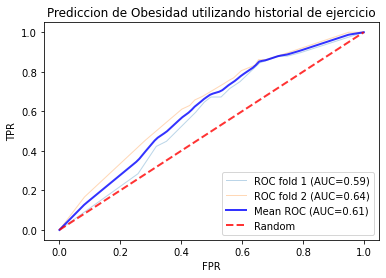

In [23]:
run_cv(inputdf, qf, "obesity", 1, "Prediccion de Obesidad utilizando historial de ejercicio")

In [27]:
from sklearn.metrics import classification_report

In [35]:
print(len(Y_prob_nba.values[:, -1]))
y_pred = []
for i in range(len(Y_prob_nba.values[:, -1])):
    if Y_prob_nba.values[i, -1] > 0:
        y_pred.append(1)
    else:
        y_pred.append(0)
print(classification_report(inputdf["obesity"].values, y_pred))

1067
[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1

In [15]:
from sklearn.metrics import precision_recall_curve

[0.2099344  0.23247664 0.24171779 0.24842371 0.25672043 0.26136364
 0.26193922 0.26461039 0.26485569 0.26863085 0.26654412 0.26741996
 0.27075099 0.27034121 0.27920228 0.24902724 1.        ]


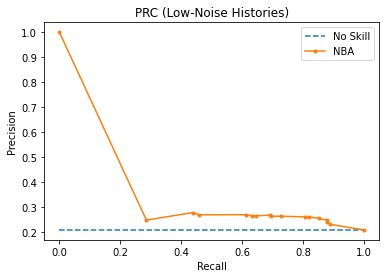

In [26]:
queries_nba = {"ejer_0": ["B", "M"],
               "ejer_1": ["B", "M"],
               "ejer_5": ["B", "M"],
               "ejer_10": ["B", "M"]
               }
nba = NB()
nba.train(queries_nba, "obesity", 1, inputdf)
nba.predict(inputdf)
Y_prob_nba = nba.predicted_scores
precision_nba, recall_nba, thresholds = precision_recall_curve(inputdf["obesity"].values, Y_prob_nba.values[:, -1])
prc_auc_nba = auc(recall_nba, precision_nba)

print(precision_nba)


# plot the precision-recall curves
no_skill = len(inputdf["obesity"].values[inputdf["obesity"].values == 1]) / len(inputdf["obesity"].values)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')

# plt.plot(recall_gnb, precision_gnb, marker='.', label="GNB (AUC=%0.2f)" % (prc_auc_gnb))
# plt.plot(recall_nba, precision_nba, marker='.', label="NBA (AUC=%0.2f)" % (prc_auc_nba))
plt.plot(recall_nba, precision_nba, marker='.', label="NBA")
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')

plt.title("PRC (Low-Noise Histories)")

# show the legend
plt.legend()
# show the plot
plt.show()

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):inputdf["obesity"].values, Y_prob_nba.values[:, -1]
    precision[i], recall[i], _ = precision_recall_curve(Y_test[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(Y_test[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(
    Y_test.ravel(), y_score.ravel()
)
average_precision["micro"] = average_precision_score(Y_test, y_score, average="micro")